In [218]:
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [219]:
# Generating a polynomial equation's output and features
X = (6 * np.random.rand(200,1)) - 3
y = (0.8 * (X**2)) + (0.9 * X) + 2 + np.random.randn(200,1)

In [220]:
X.shape,y.shape

((200, 1), (200, 1))

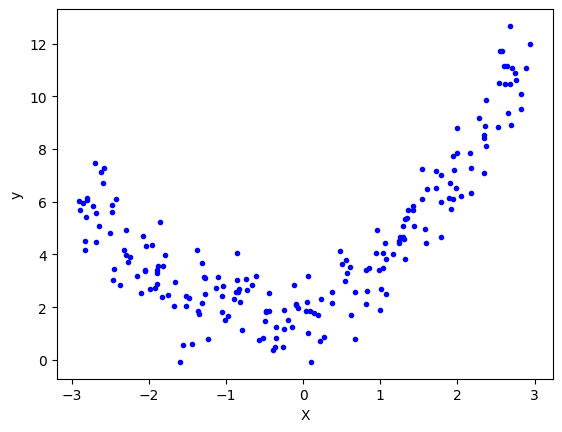

In [221]:
# Now lets plot this and visualize whether this is a polynomial or not . 
plt.plot(X,y,'b.') # We use plot for better visulization
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [222]:
# Splitting the dataset into train and test
X_train , X_test , y_train ,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [223]:
# Now we will try to apply Linear Regression and try to fit the line for this 
lr = LinearRegression()

In [224]:
lr.fit(X_train,y_train) # Fitting the training sets

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [225]:
y_pred = lr.predict(X_test) # Prediction on testing set

In [226]:
# R2 score for the prediction
r2_score(y_test,y_pred)

0.02975317675786404

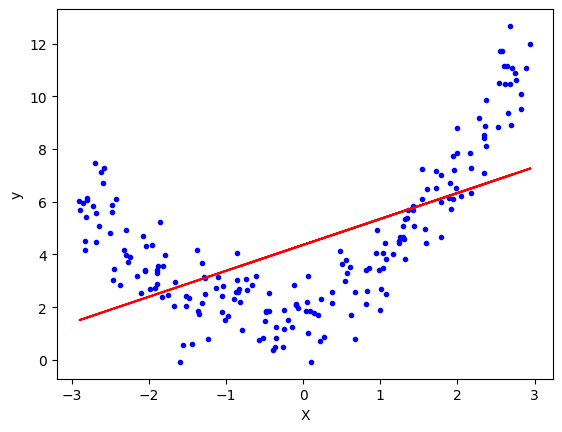

In [227]:
# Now lets visualize the line fitted 
plt.plot(X,y,'b.')
plt.plot(X,lr.predict(X),color='red') # We use X here cause the no of rows and columns for X and y paramter must be same , also we wanted the whole line so X.
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [228]:
# As we can see the line is unable to fit accordingly , and we are not able to justify it.
# Now we will use Polynomial Regression using Polynomial Features
# We will pass in the degree and we will get n columns accordingly from degree 0 to n

poly = PolynomialFeatures(degree=2,include_bias=True) # Instanitation
X_train_trans = poly.fit_transform(X_train) # We use fit transform once on X_train so it learns ON X_train data and there is no data leaks on X_test
X_test_trans = poly.transform(X_test)

In [229]:
X_train[0],X_train_trans[0] # Here we can check the polynomial columns formed for that value 

(array([1.72424679]), array([1.        , 1.72424679, 2.973027  ]))

In [230]:
# Now we will Redo the process of fitting by using LinearRegression to check how this will affect 
plr = LinearRegression()

In [231]:
plr.fit(X_train_trans,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [232]:
plr.coef_,plr.intercept_

(array([[0.        , 0.92311534, 0.82393703]]), array([2.0040647]))

In [233]:
r2_score(y_test,plr.predict(X_test_trans)) # As we can see the model performance improved

0.8660699315475007

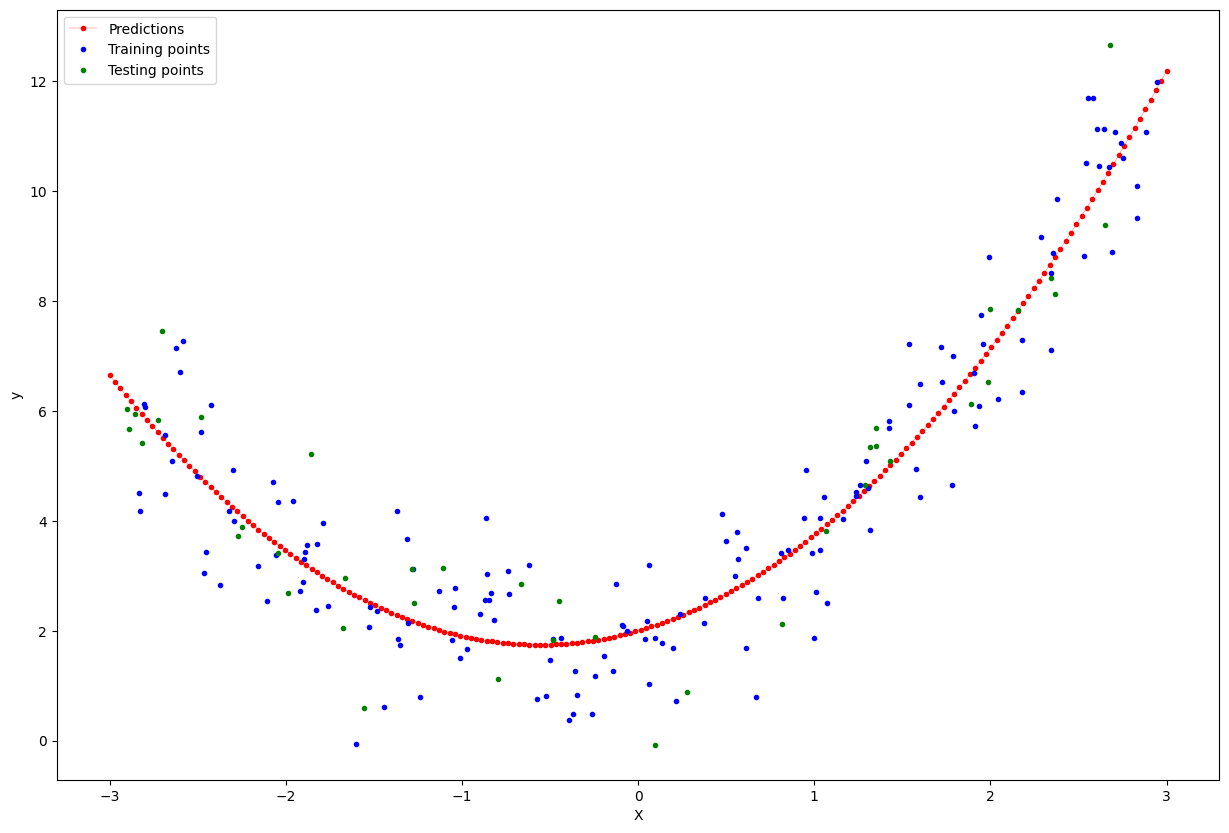

In [234]:
# Needed variables for plotting the curve
X_new=np.linspace(-3, 3, 200).reshape(200, 1) # We took this by loooking at the boundaries of the graph in y axis
X_new_poly = poly.transform(X_new)
y_new = plr.predict(X_new_poly)

# Now lets visualize the graph
plt.figure(figsize=(15,10))
plt.plot(X_new,y_new,'r.-',linewidth=0.2,label='Predictions')
plt.plot(X_train,y_train,'b.',label='Training points') 
plt.plot(X_test,y_test,'g.',label='Testing points') 
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [235]:
# Now using a function that plots graph provided the degree
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

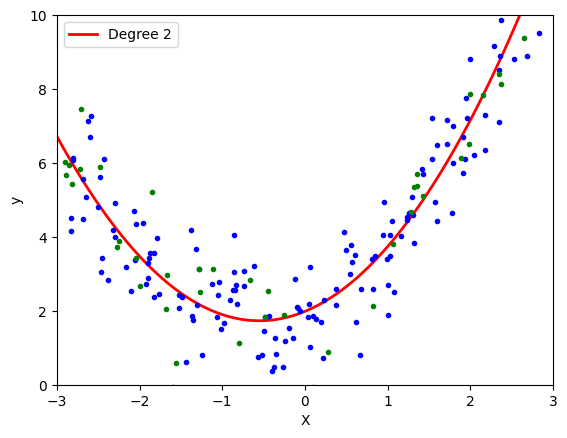

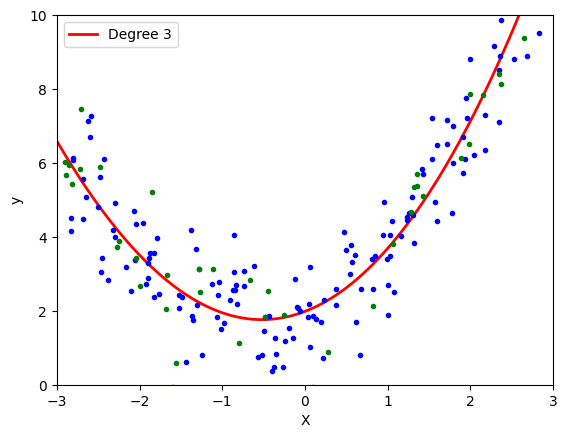

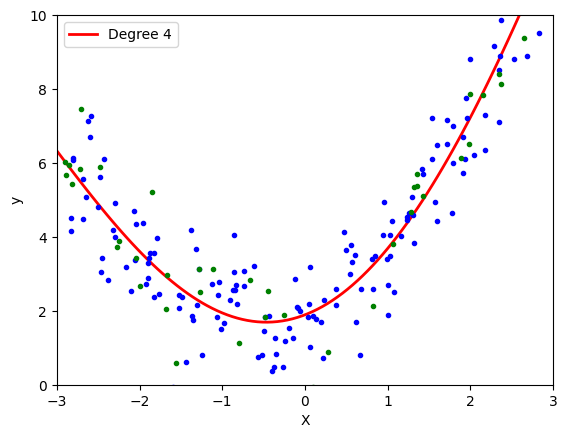

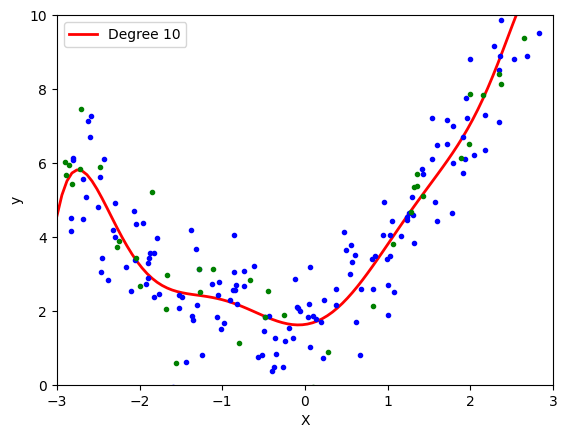

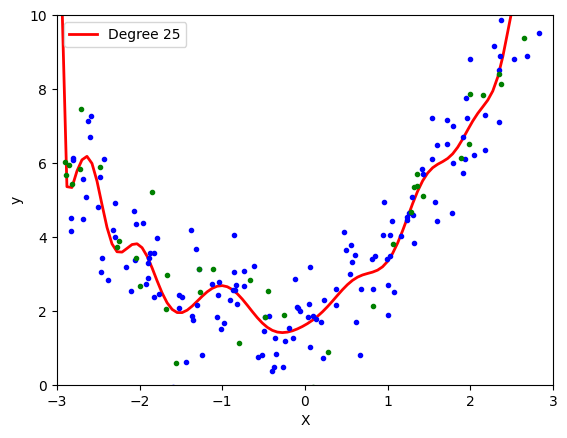

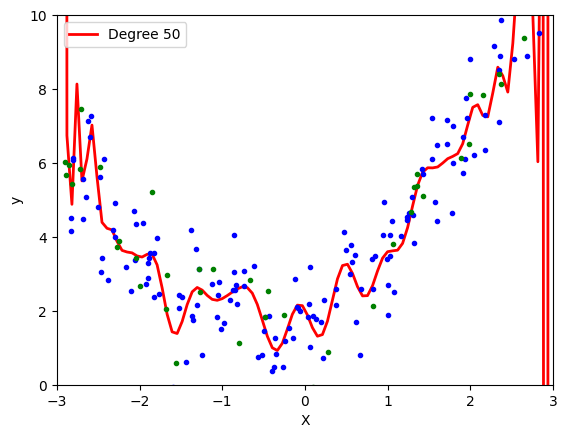

(None, None, None, None, None, None)

In [236]:
polynomial_regression(2),polynomial_regression(3),polynomial_regression(4),polynomial_regression(10),polynomial_regression(25),polynomial_regression(50)

In [237]:
# We have to make sure there is no overfitting ,and underfitting .
# So we have to choose the degree accurately

c:\Users\hp\Desktop\ML\.venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


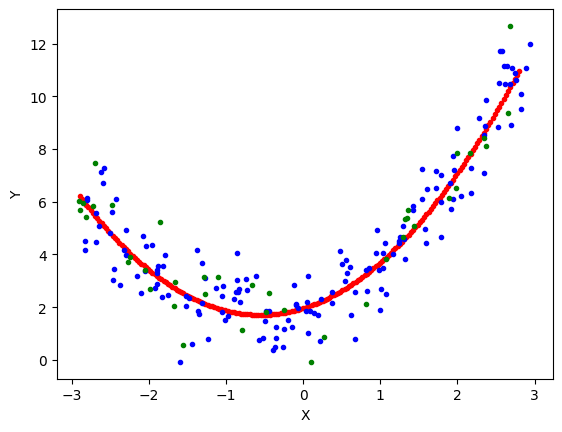

In [245]:
# Now lets apply Gradient Descent on this and check its performance

#Instanitate the SGDRegressor with max_iterations
sgd = SGDRegressor(max_iter=100)

sgd.fit(X_train_trans,y_train) # Fit the data

# Now lets talk about the curve we are gonna plot with the help of linspace.
# Linspace helps us to create no of points between start and stop .
X_new = np.linspace(-2.9,2.8,200).reshape(200,1) # We reshape to convert this to 2D
X_new_poly = poly.transform(X_new) # Transformation for whole X range
y_new = sgd.predict(X_new_poly) # Prediction on X_new_poly

y_pred = sgd.predict(X_test_trans) # Prediction on test set

# Plotting this
plt.plot(X_new,y_new,'r.',linewidth=2,label='Curve')
plt.plot(X_train,y_train,'b.',label='Training set')
plt.plot(X_test,y_test,'g.',label='Testing set')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
plt.show()
